일별시세 페이지 분석

In [1]:
index_cd = 'KPI200'
page_n = 1
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)

In [2]:
from urllib.request import urlopen  
source = urlopen(naver_index).read()
source

b'\n\n\n\n\n\n\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n<link rel="stylesheet" type="text/css" href="/css/newstock.css?20200803172755">\n<link rel="stylesheet" type="text/css" href="/css/common.css?20200803172755">\n<link rel="stylesheet" type="text/css" href="/css/layout.css?20200803172755">\n<link rel="stylesheet" type="text/css" href="/css/main.css?20200803172755">\n<link rel="stylesheet" type="text/css" href="/css/newstock2.css?20200803172755">\n<link rel="stylesheet" type="text/css" href="/css/newstock3.css?20200803172755">\n<link rel="stylesheet" type="text/css" href="/css/world.css?20200803172755">\n</head>\n<body>\n<script type="text/javascript" src="/js/jindo.min.ns.1.5.3.euckr.js?20200803172755"></script>\n<script type="text/javascript" src="/js/lcslog.js?20200803172755"></script>\n\t\t\t\t<!-- \xc0\xcf\xba\xb0\xbd\xc3\xbc\xbc -->\n\t\t\t\t<div class="box_type_m">

In [3]:
import bs4
source = bs4.BeautifulSoup(source, 'lxml')

In [4]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="/css/newstock.css?20200803172755" rel="stylesheet" type="text/css"/>
  <link href="/css/common.css?20200803172755" rel="stylesheet" type="text/css"/>
  <link href="/css/layout.css?20200803172755" rel="stylesheet" type="text/css"/>
  <link href="/css/main.css?20200803172755" rel="stylesheet" type="text/css"/>
  <link href="/css/newstock2.css?20200803172755" rel="stylesheet" type="text/css"/>
  <link href="/css/newstock3.css?20200803172755" rel="stylesheet" type="text/css"/>
  <link href="/css/world.css?20200803172755" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <script src="/js/jindo.min.ns.1.5.3.euckr.js?20200803172755" type="text/javascript">
  </script>
  <script src="/js/lcslog.js?20200803172755" type="text/javascript">
  </script>
  <!-- 일별시세 -->
  <div class="box_type_m">
   <h4 class="top_tlt" style="text-align:left;">
    <em>
   

In [5]:
td = source.find_all('td')
len(td)

54

날짜 추출

In [6]:
# /html/body/div/table[1]/tbody/tr[3]/td[1]
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]


<td class="date">2020.08.06</td>

In [7]:
d = source.find_all('td', class_='date')[0].text
d

'2020.08.06'

In [8]:
import datetime as dt

In [9]:
yyyy = int(d.split('.')[0]) 
mm = int(d.split('.')[1])
dd = int(d.split('.')[2])

this_date= dt.date(yyyy, mm, dd)
this_date

datetime.date(2020, 8, 6)

날짜정보를  date 타입으로 변경하는 함수 정의

In [10]:
def date_format(d):
    d = str(d).replace('-', '.')
    
    yyyy = int(d.split('.')[0]) 
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])

    this_date= dt.date(yyyy, mm, dd)
    return this_date

종가 추출

In [11]:
# /html/body/div/table[1]/tbody/tr[3]/td[2]

In [12]:
this_close = source.find_all('tr')[2].find_all('td')[1].text
this_close = this_close.replace(',', '')
this_close = float(this_close)
this_close

310.43

In [13]:
p = source.find_all('td', class_='number_1')[0].text
p

'310.43'

페이지 상의 날짜와 종가정보 전체 추출

In [14]:
dates = source.find_all('td', class_='date')
prices = source.find_all('td', class_='number_1')

In [15]:
len(dates)

6

In [16]:
len(prices)

24

In [17]:
for n in range(len(dates)):
    this_date = dates[n].text
    this_date = date_format(this_date)
    
    this_close = prices[n*4].text   
    # 0, 4, 8, ... 4의 배수로 돌아가는 가격 추출
    this_close = this_close.replace(',', '')
    this_close = float(this_close)
    this_close
    
    print(this_date, this_close)

2020-08-06 310.43
2020-08-05 306.64
2020-08-04 303.04
2020-08-03 299.46
2020-07-31 299.32
2020-07-30 301.85


마지막 페이지 번호 찾기

In [18]:
# /html/body/div/table[2]/tbody/tr/td[7]/a

In [19]:
paging = source.find('td', class_='pgRR').find('a')['href']
paging

'/sise/sise_index_day.nhn?code=KPI200&page=602'

In [20]:
paging = paging.split('&')[1]
paging

'page=602'

In [21]:
paging = paging.split('=')[1]
paging

'602'

In [22]:
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(505)

source = urlopen(naver_index).read()
source = bs4.BeautifulSoup(source, 'lxml')

if source.find('td', class_='pgRR'):
    last_page = source.find('td', class_='pgRR').find('a')['href']
    last_page = last_page.split('&')[1]
    last_page = last_page.split('=')[1]
    last_page = int(last_page)

In [23]:
def historical_index_naver(index_cd, page_n=1, last_page=0):   
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            # 종가 처리
            this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
            this_close = this_close.replace(',', '')
            this_close = float(this_close)

            # 딕셔너리에 저장
            historical_prices[this_date] = this_close
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

네이버에서 일자별 인덱스를 추출하는 함수 정의

In [24]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:   
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
        
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:   
            # start_date 이전이면 함수 종료
                return historical_prices              
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   
        page_n = page_n + 1   
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

In [25]:
index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2018-4-1', '2018-4-4')
historical_prices

{datetime.date(2018, 4, 4): 308.54,
 datetime.date(2018, 4, 3): 313.38,
 datetime.date(2018, 4, 2): 314.0}

# 다음에서 해외지수 추출 (다음 사이트 개편으로 네이버로 대체합니다)

본 섹션의 내용은 다음 금융사이트 개편으로 사용이 불가해져, 네이버에서 해외지수 추출로 대체합니다.

# 네이버에서 해외지수 추출하기 (다음 해외지수 대체)

In [26]:
import pandas as pd
from urllib.request import urlopen
import json   # 해외지수는 json 형태로 표출됨

In [27]:
symbol = 'NII@NI225'
page = 1

In [28]:
url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol='+symbol+'&fdtc=0&page='+str(page)
raw = urlopen(url)
data = json.load(raw)

In [29]:
data[0]

{'symb': 'NII@NI225',
 'xymd': '20200805',
 'open': 22479.72,
 'high': 22554.2,
 'low': 22356.25,
 'clos': 22514.85,
 'diff': -58.81,
 'rate': -0.26,
 'gvol': 74004200}

In [30]:
data[0]['symb']

'NII@NI225'

In [31]:
data[0]['xymd']

'20200805'

In [32]:
data[0]['clos']

22514.85

In [33]:
len(data)

9

In [34]:
d = dict()
for n in range(len(data)):
    date = pd.to_datetime(data[n]['xymd']).date()
    price = float(data[n]['clos'])
    d[date] = price
print(d)

{datetime.date(2020, 8, 5): 22514.85, datetime.date(2020, 8, 4): 22573.66, datetime.date(2020, 8, 3): 22195.38, datetime.date(2020, 7, 31): 21710.0, datetime.date(2020, 7, 30): 22339.23, datetime.date(2020, 7, 29): 22397.11, datetime.date(2020, 7, 28): 22657.38, datetime.date(2020, 7, 27): 22715.85, datetime.date(2020, 7, 22): 22751.61}


In [35]:
def read_json(d, symbol, page=1):
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol='+symbol+'&fdtc=0&page='+str(page)
    raw = urlopen(url)
    data = json.load(raw)
    
    for n in range(len(data)):
        date = pd.to_datetime(data[n]['xymd']).date()
        price = float(data[n]['clos'])
        d[date] = price
        
    if len(data) == 10 and page<3:
        page += 1
        read_json(d, symbol, page)
        
    return (d)

In [36]:
historical_index = pd.Series()
historical_index = read_json(historical_index, symbol, page)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [37]:
historical_index.head(3)

2020-08-05    22514.85
2020-08-04    22573.66
2020-08-03    22195.38
dtype: float64

In [38]:
indices = {
    'SPI@SPX' : 'S&P 500', 
    'NAS@NDX' : 'Nasdaq 100', 
    'NII@NI225' : 'Nikkei 225'
}

In [39]:
historical_indices = dict()
for key, value in indices.items(): 
    print (key, value)
    s = dict()
    s = read_json(s, key, 1)
    historical_indices[value] = s    
prices_df = pd.DataFrame(historical_indices)

SPI@SPX S&P 500
NAS@NDX Nasdaq 100
NII@NI225 Nikkei 225


In [40]:
prices_df.tail(3)

,S&P 500,Nasdaq 100,Nikkei 225
2020-06-26,3009.05,9849.36,NaN
2020-06-25,3083.76,10101.83,NaN
2020-06-24,3050.33,10002.70,NaN


In [41]:
def date_format(d=''):
    if d != '':
        this_date = pd.to_datetime(d).date()
    else:
        this_date = pd.Timestamp.today().date()   # 오늘 날짜를 지정
    return (this_date)

In [42]:
def index_global(d, symbol, start_date='', end_date='', page=1):

    end_date = date_format(end_date)
    if start_date == '':
        start_date = end_date - pd.DateOffset(months=1)
    start_date = date_format(start_date)
        
    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol='+symbol+'&fdtc=0&page='+str(page)
    raw = urlopen(url)
    data = json.load(raw)
    
    if len(data) > 0:
        
        for n in range(len(data)):
            date = pd.to_datetime(data[n]['xymd']).date()

            if date <= end_date and date >= start_date:   
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                price = float(data[n]['clos'])
                # 딕셔너리에 저장
                d[date] = price
            elif date < start_date:   
            # start_date 이전이면 함수 종료
                return (d)              

        if len(data) == 10:
            page += 1
            index_global(d, symbol, start_date, end_date, page)
        
    return (d)

In [43]:
historical_indices = dict()
start_date = '2019-01-01'
end_date = '2019-3-31'
for key, value in indices.items(): 
    s = dict()
    s = index_global(s, key, start_date)
    historical_indices[value] = s    
prices_df = pd.DataFrame(historical_indices)

In [44]:
prices_df = pd.DataFrame(historical_indices, index=historical_indices['S&P 500'].keys())
prices_df.tail()

,S&P 500,Nasdaq 100,Nikkei 225
2019-01-08,2574.41,6551.85,NaN
2019-01-07,2549.69,6488.25,NaN
2019-01-04,2531.94,6422.67,NaN
2019-01-03,2447.89,6147.13,NaN
2019-01-02,2510.03,6360.87,NaN


In [45]:
prices_df

,S&P 500,Nasdaq 100,Nikkei 225
2020-08-05,3327.77,11125.44,22514.85
2020-08-04,3306.51,11096.54,22573.66
2020-08-03,3294.61,11055.08,22195.38
2020-07-31,3271.12,10905.88,21710.00
2020-07-30,3246.22,10715.51,22339.23
...,...,...,...
2019-01-08,2574.41,6551.85,NaN
2019-01-07,2549.69,6488.25,NaN
2019-01-04,2531.94,6422.67,NaN
2019-01-03,2447.89,6147.13,NaN


# 만들어둔 함수를 이용해 KOSPI200과 S&P500 지수 추출

In [46]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2017-1-1', '2017-12-31')

In [47]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500 = index_global(historical_prices, index_cd, '2017-1-1', '2017-12-31')    # 대체 코드
# sp500 = historical_global_daum(index_cd, '2017-1-1', '2017-12-31')    # 이전 코드

In [48]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [49]:
import pandas as pd

In [50]:
df = pd.DataFrame(tmp)
df.sort_index(inplace=True)   # 날짜순으로 정렬하기 위한 코드 추가
df

,S&P500,KOSPI200
2017-01-02,NaN,260.36
2017-01-03,2257.83,262.97
2017-01-04,2270.75,263.12
2017-01-05,2269.00,261.98
2017-01-06,2276.98,263.20
...,...,...
2017-12-22,2683.34,321.21
2017-12-26,2680.50,318.89
2017-12-27,2682.62,320.25
2017-12-28,2687.54,324.74


In [51]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,S&P500,KOSPI200
2017-01-02,2257.83,260.36
2017-01-03,2257.83,262.97
2017-01-04,2270.75,263.12
2017-01-05,2269.00,261.98
2017-01-06,2276.98,263.20
...,...,...
2017-12-22,2683.34,321.21
2017-12-26,2680.50,318.89
2017-12-27,2682.62,320.25
2017-12-28,2687.54,324.74


In [52]:
df.head()

,S&P500,KOSPI200
2017-01-02,2257.83,260.36
2017-01-03,2257.83,262.97
2017-01-04,2270.75,263.12
2017-01-05,2269.00,261.98
2017-01-06,2276.98,263.20


In [53]:
index_cd = 'KPI200'
historical_prices = dict()
kospi200 = historical_index_naver(index_cd, '2008-1-1', '2017-12-31')

In [54]:
index_cd = 'SPI@SPX'
historical_prices = dict()
sp500 = index_global(historical_prices, index_cd, '2008-1-1', '2017-12-31')    # 대체 코드
# sp500 = historical_global_daum(index_cd, '2008-1-1', '2017-12-31')     # 이전 코드

In [55]:
tmp = {'S&P500':sp500, 'KOSPI200':kospi200}

In [56]:
df = pd.DataFrame(tmp)
df.sort_index(inplace=True)   # 날짜순으로 정렬하기 위한 코드 추가
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2017-12-22,2683.34,321.21
2017-12-26,2680.50,318.89
2017-12-27,2682.62,320.25
2017-12-28,2687.54,324.74


In [57]:
df = df.fillna(method='ffill')
if df.isnull().values.any():
    df = df.fillna(method='bfill')
df

,S&P500,KOSPI200
2008-01-02,1447.16,235.30
2008-01-03,1447.16,234.67
2008-01-04,1411.63,235.77
2008-01-07,1416.18,231.00
2008-01-08,1390.19,230.34
...,...,...
2017-12-22,2683.34,321.21
2017-12-26,2680.50,318.89
2017-12-27,2682.62,320.25
2017-12-28,2687.54,324.74


# matplotlib를 이용해 그래프 그리기

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
# pandas 버전 변경에 따른 코드 수정
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

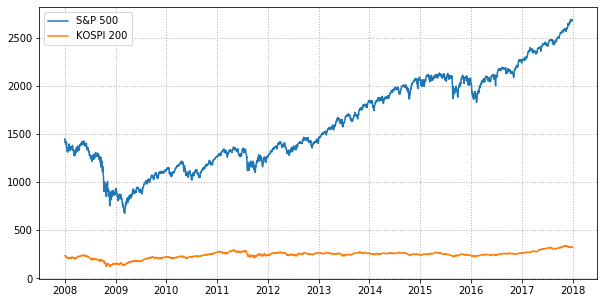

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'], label='S&P 500')
plt.plot(df['KOSPI200'], label='KOSPI 200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [61]:
df.iloc[0]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

In [62]:
df.loc[dt.date(2008, 1, 2)]

S&P500      1447.16
KOSPI200     235.30
Name: 2008-01-02, dtype: float64

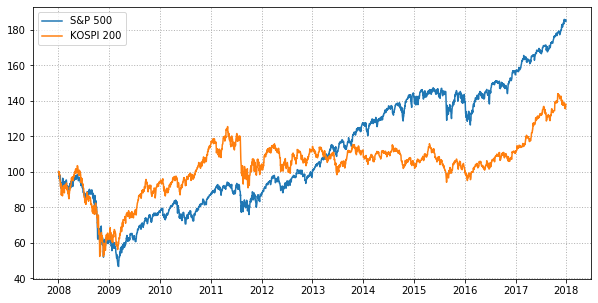

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(df['S&P500'] / df['S&P500'].loc[dt.date(2008, 1, 2)] * 100, label='S&P 500')
plt.plot(df['KOSPI200'] / df['KOSPI200'].loc[dt.date(2008, 1, 2)] * 100, label='KOSPI 200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

In [64]:
df_ratio_2016_now = df.loc[dt.date(2016, 1, 4):] / df.loc[dt.date(2016, 1, 4)] * 100
df_ratio_2016_now.head(3)

,S&P500,KOSPI200
2016-01-04,100.000000,100.000000
2016-01-05,100.201226,100.639304
2016-01-06,98.887045,99.987214


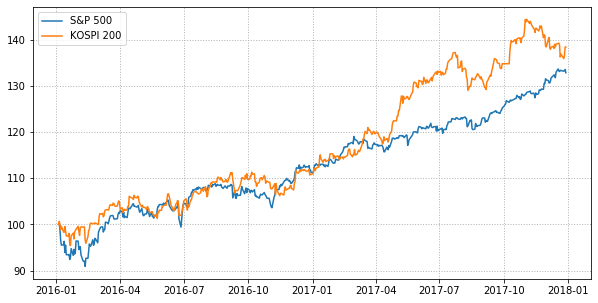

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(df_ratio_2016_now['S&P500'], label='S&P 500')
plt.plot(df_ratio_2016_now['KOSPI200'], label='KOSPI 200')
plt.legend(loc=0)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

Text(0, 0.5, 'KOSPI200')

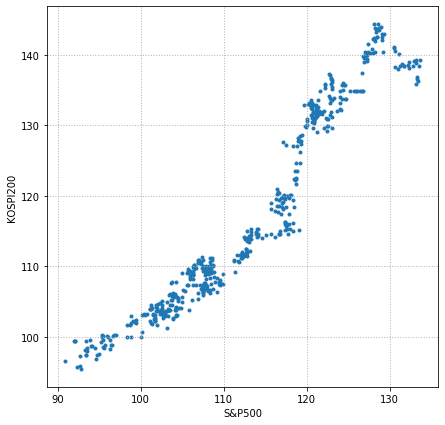

In [66]:
plt.figure(figsize=(7,7))
plt.scatter(df_ratio_2016_now['S&P500'], df_ratio_2016_now['KOSPI200'], marker='.')
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')

In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = df_ratio_2016_now['S&P500']
y = df_ratio_2016_now['KOSPI200']

# 1개 컬럼 np.array로 변환
independent_var = np.array(x).reshape(-1, 1)
dependent_var = np.array(y).reshape(-1, 1)

# Linear Regression
regr = LinearRegression()
regr.fit(independent_var, dependent_var)

result = {'Slope':regr.coef_[0,0], 'Intercept':regr.intercept_[0], 'R^2':regr.score(independent_var, dependent_var) }
result

{'Slope': 1.2880889473807509,
 'Intercept': -28.225702646637544,
 'R^2': 0.9210659719797479}

Text(0, 0.5, 'KOSPI200')

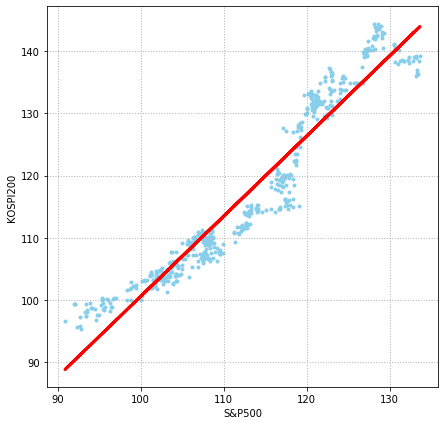

In [68]:
plt.figure(figsize=(7,7))
plt.scatter(independent_var, dependent_var, marker='.', color='skyblue')
plt.plot(independent_var, regr.predict(independent_var), color='r', linewidth=3)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)
plt.xlabel('S&P500')
plt.ylabel('KOSPI200')